# NNIA Assignment 8

**DEADLINE: 11. 01. 2023 08:00 CET**
Submission more than 10 minutes past the deadline will **not** be graded!

- Benedict Schneider 7009917 (BESC0005): 6 hrs 
- Iris Ferazzo 7028674 (IRFE001): 8 hrs
- Lucas Fonseca Lage 7024877 (LUFO00001): 8 hrs

# Submission Instructions

**IMPORTANT** Please make sure you read the following instructions carefully. If you are unclear about any part of the assignment, ask questions **before** the assignment deadline. All course-related questions can be addressed on the course **[Piazza Platform](https://piazza.com/class/kvc3vzhsvh55rt)**.

* Assignments are to be submitted in a **team of 2 or 3**.
* Please include your **names**, **ID's**, **Teams usernames**, and **approximate total time spent per person** at the beginning of the Notebook in the space provided
* Make sure you appropriately comment your code wherever required.
* Your final submission should contain this completed Jupyter Notebook, including the bonus question (if you attempt it), and any necessary Python files.
* Do **not** submit any **data or cache files** (e.g. `__pycache__`, the dataset PyTorch downloads, etc.). 
* Upload the **zipped** folder (*.zip* is the only accepted extension) in **Teams**.
* Only **one member** of the group should make the submisssion.
* **Important** please name the submitted zip folder as: `Name1_id1_Name2_id2.zip`. The Jupyter Notebook should also be named: `Name1_id1_Name2_id2.ipynb`. This is **very important** for our internal organization epeatedly students fail to do this.

## 1 SGD, Batch, Mini-Batch  (1.5 pts)

Typically neural networks are large and are trained with millions of data points. It is thus often infeasible to compute the gradient $\nabla_{\theta} \tilde J(\theta)$ that requires the accumulation of the gradient over the entire training set. 

There are various online resources on Stochastic, Batch, and Minit-Gradient Descent methods in addition to what was covered during the lecture. Here are a few:

- [Medium: Batch , Mini-Batch and Stochastic gradient descent](https://sweta-nit.medium.com/batch-mini-batch-and-stochastic-gradient-descent-e9bc4cacd461)
- [DeepLearningAI: Batch vs Mini-Batch](https://youtu.be/4qJaSmvhxi8)

**Discuss pros and cons of (1) stochastic (m=1), (2) batch (m = size of dataset) and (3) mini-batch gradient descent** (m is the number of points passed at a time).

## <font color="Green">Done</font>


### 1

    Stochastic:

One single datapoint is fed to the network at a time. The weights are updated after loss is calculated for each current datapoint.

- Pro: The process fo learning and weight updates is faster. Loss function and optimizer are not suppose to wait for the entire datasets to calculate itself. Since memory consumption is low, SGD is faster than MGD and BGD.

- Cons: Huge oscillation: SGD will always vary from one point to another for each and every datasets. This results in the difficulty of finding absolute minima, but instead only several local minima. Learning rate: if the learning rate is too high, it may be possible that some other datapoint may not show you the same properties. SGD often results in ill conidtioning.

    Batch:

The weights are updated after loss is calculated per each epoch in which all datapoints of dataset are fed to the network.

- Pro: It is more computationally efficient than SGD.

- Cons: High memory consumption: we pass the whole dataset at each epoch, so the computation is high, and the calculation very slow and the optimization will also be slower.

    Mini-Batch:

The weights are updated after loss is calculated per each epoch in which all datapoints of a portion of the dataset (a mini-batch) is fed to the network.

- Pro: We pass smaller amounts of data into the model, so it gets updated more often than in the single-batch case. Reduced memory consumption: it performs faster and uses less memory. The batches updates are computationally more efficient than SGD. The number of mini-batches is a learnable parameter, a hyperparameter that we can fine-tune.

- Cons: No guarantee of convergence of a error in a better way. Not representing the properties (or variance) of entire datasets, only of the current portion of it. Difficulty of getting absolute global or local minima. If the learning rate is too low, the convergence rate will fall. If the learning rate is too high, we won’t get an absolute global or local minima.


## 2 Possible Problems (2.5 pts)

1. One of the optimization challenges is ill-conditioning. To answer the following questions read [this article](https://medium.com/@shaikhz94/understanding-ill-conditioning-in-deep-neural-networks-2396d6fb0098) (6 min read). Answer the questions in your own words. (1.5 pts) 
  - Read part [8.2.1 Ill-Conditioning](https://www.deeplearningbook.org/contents/optimization.html) of the Deep Learning Book and explain why very small steps increase cost function when the Hessian matrix is ill-conditioned. Start from the equation of the second-order Taylor series expansion of the cost function.  
  - In practice, how can we spot ill-conditioning?
  - What can we do to solve the problem of ill-conditioning?
		
2. Explain what the exploding gradient problem is and when it occurs. What can be done to solve the exploding gradient problem? (1 pt)


## <font color="Green">Done</font>


### 2

1.  
In practice we can use the equation:
\begin{align*}
    \frac{1}{2} * LearningRate² * \bold{g}^T * H* \bold{g} - LearningRate * g^T * g  
\end{align*}
where **g** is the first order gradient and **H** is the second order derivative or the Hessian Matrix. The ill-conditioning problem happens when the left term is higher then the right term.
To avoid ill-conditioning one can monitor the term:
\begin{align*} 
\bold{g}^T * H* \bold{g} 
\end{align*}
which increses in order of magnitude during training.

To find out which learning rates would be optimal, we can plot the step size with the learning rate, and find the point where the values for the step size become positive, this means that the value of the cost function will increase with each step.

A solution for ill-conditioning is using adaptive optimizers or pre-process the dataset. 



2. The exploding gradient problem occurs when a Neural Network has many too many layers, or a deep computational graph. 
This means that, in a Recurrent Neural Network for example, while calculating the gradient, the weights matrix will be multiplied multiple times.

\begin{align*}
    \bold{W}^t = (\bold{V}diag(\lambda)\bold{V}^{-1})^{t} = (\bold{V}diag(\lambda)^{t}\bold{V}^{-1})
\end{align*}

If any of the eigenvalues $\lambda$ are not close to absolute one, they might vanish, if they are close to 0, or explode, if they are greater than 1.

Feedforward NN largely avoid this problem, since they use different weight matrices at each time step.

To solve it, we can, among others, limit the size of gradients during training of the network (gradient clipping), or check the size of the network weights and apply a penalty to the network's loss function for large weight values (weight regularization).
  

## 3 Implementation (6 points)

Now you will be implementing and testing different approaches to optimize the training of a neural network. Here you will be working with the [CIFAR10](https://pytorch.org/vision/stable/generated/torchvision.datasets.CIFAR10.html#cifar10) dataset, which consists of images of airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. Once again [cross entropy loss](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) will be used as the loss criterion.

### 3.1 Early Stopping (2 points)

Although not covered explicitly in the last lecture as an optimization strategy, early stopping can be used as both a regularization technique and an optimization technique.

Early stopping is necessary since we are training and reducing empirical risk, thus our algorithms will not halt, they will simply be stopped once a convergence criteria has been met. Up until this point we have used a very crude strategy of simply limiting our learning to a number of epochs or steps.

In this exercise, you are tasked with implementing a simple version of early stopping. The way to usually implement early stopping is to stop the training once a specific metric does not change more than an arbitrary value $\varepsilon$ after a number of epochs (or steps) $n$, i.e.: $\forall i \in {1..n} \,\, \left\| M_i - M_{i-1} \right\| < \varepsilon$ where $M_i$ is the value of the metric at epoch $i$.

**Note**: The $n$ value above is usually called `patience` in common implementations.

In [1]:
!pip install -q torcheval

In [2]:
# Let's import some libraries
import torch
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from torcheval.metrics import MulticlassAccuracy

import numpy as np
from tqdm.notebook import tqdm

/home/lucasfl/anaconda3/envs/nn_22_23/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: /home/lucasfl/anaconda3/envs/nn_22_23/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKNSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEE
  warn(f"Failed to load image Python extension: {e}")


#### CIFAR-10: Some notes about our data

This dataset presents a multi-class classification task. More details can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

Important details:

* Each image is a color image of 32x32 pixels
* There are 10 classes (laid out in the following code)
* You should use the [MulticlassAccuracy](https://torchmetrics.readthedocs.io/en/stable/classification/accuracy.html#multiclassaccuracy) from the `torcheval.metrics` library (already installed and imported for you).

A quick overview of how to use metrics on pytorch can be found [here](https://torchmetrics.readthedocs.io/en/stable/pages/overview.html).

The TL;DR of it all is to compute metrics per batch using the `update` method and computing a final metric value with `compute`. 

In [3]:
# Let's load our data before getting into it
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 32

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [4]:
# A model is given for ease of reproducibility
class MyNetwork(nn.Module):
    def __init__(self, lr=0.0001):
        super(MyNetwork, self).__init__()
        self.learning_rate = lr

        self.network = nn.Sequential(
            nn.Linear(32*32*3, 64),
            nn.ReLU(),
            nn.Linear(64, 10),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        return self.network(x)


In [5]:
# Skeleton code 
class EarlyStopChecker:
    def __init__(self,
               delta: float,
               patience: float,
               lower_better: bool = False):
    
        """
        Params:
        delta: The max difference allowed
        patience: Number of epochs to tolerate without significant changes
        lower_better: The metric value is better, the lower it is if `True` is passed
        """
        # TODO
        self.patience = patience
        self.delta = delta
        self.lower_better = lower_better
        self.patience_count = 0
        self.metric_previous = 0
        pass
  
    def check_early_stop(self,
                       metric_value: float) -> bool:
        """
        A function which upon receiving the latest metric value, determines
        whether training should be stopped (by returning `True`) or not 
        (by returning `False`)
    
        Params:
        metric_value: The value of the metric at this time step
        Returns `True` if training should stop, `False` otherwise.
        """
        
        # TODO: Implement
        if self.lower_better == False:
            if metric_value - self.metric_previous < self.delta:
                self.patience_count += 1
                self.metric_previous = metric_value
            else:
                self.patience_count = 0
                self.metric_previous = metric_value
        
        if self.lower_better == True:
            if abs(self.metric_previous - metric_value) < self.delta:
                self.patience_count += 1
                self.metric_previous = metric_value
            else:
                self.patience_count = 0
                self.metric_previous = metric_value

        if self.patience_count == self.patience:
            return True
        else:
            return False

In [6]:
# High learning rate so we can see the early stop effects quickly
net = MyNetwork(lr=0.5)

In [7]:
# Training loop code
epochs = 20
early_stopper = EarlyStopChecker(0.1, 3)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=net.learning_rate)
metric = MulticlassAccuracy(num_classes=len(classes))

for epoch in range(epochs):
    running_loss = 0.0
    for n_batch, mini_batch in (pbar := tqdm(enumerate(trainloader, 1),
                                           total=len(trainloader))):
        
        # Training code
        inputs, labels = mini_batch
        optimizer.zero_grad()
    
        # Do optimization step
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    
        # Print some statistics
        running_loss += loss.item()
        pbar.set_description(f"Loss: {running_loss / n_batch:.4f}")
        pbar.refresh()
        
        #print(outputs,labels)
      # TODO: compute metrics on the test/validation dataset
        metric.update(outputs,labels)
        
    current_metric = metric.compute()
      # TODO: Use `early_stopper.check_early_stop()` to check
      # whether training should continue
    if early_stopper.check_early_stop(current_metric):
            print(f"Accuracy for batch #{epoch}: {current_metric.item()}")
            break

    print(f"Accuracy for epoch #{epoch}: {current_metric.item()}")

  # Reset the metric in preparation for the next epoch
    metric.reset()

  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy for epoch #0: 0.34077998995780945


  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy for epoch #1: 0.370959997177124


  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy for epoch #2: 0.3807399868965149


  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy for batch #3: 0.3795599937438965


### 3.2 Trying different optimizers (2 points)

### 3.2.1 Using different optimizers in pytorch (1 point)

It's time to try out the different optimizers covered in the lecture.

Create a function that returns an optimizer object for each of the following:

1. [SGD with Momentum](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html): note that you should set the momentum parameter to $0.9$. This is the value usually picked as the hyperparameter although other approaches to picking a value exist.
1. [AdaGrad](https://pytorch.org/docs/stable/generated/torch.optim.Adagrad.html)
1. [RMSProp](https://pytorch.org/docs/stable/generated/torch.optim.RMSprop.html)
1. [Adam](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html)


In [8]:
# Set our seed for reproducibility
torch.manual_seed(0)

In [9]:
def get_optimizer(optimizer_name: str,
                  model: nn.Module,
                  learning_rate: float):
    """
    Function that returns an optimizer object that will be used
    for training

    Params:
    optimizer_name: This will indicate the type of optimizer to return
    model: Model which has the parameters to be optimized
    learning_rate: learning rate to be used
    """
    # TODO: return the right object
    if optimizer_name == "momentum":
        return optim.SGD(model.parameters(), momentum=.9,lr=learning_rate)
    elif optimizer_name == "adagrad":
        return optim.Adagrad(model.parameters(), lr=learning_rate)
    elif optimizer_name == "rmsprop":
        return optim.RMSprop(model.parameters(), lr=learning_rate)
    elif optimizer_name == "adam":
        return optim.Adam(model.parameters(), lr=learning_rate)
    else:
        print("no optimizer found")
        return None
  

In [10]:
# Usage:
sgd_mom_optimizer = get_optimizer('momentum', net, learning_rate=0.01)
adagrad_optimizer = get_optimizer('adagrad', net, learning_rate=0.01)
rms_optimizer = get_optimizer('rmsprop', net, learning_rate=0.01)
adam_optimizer = get_optimizer('adam', net, learning_rate=0.01)

#### 3.2.2 Discussion (1 point)

What result do you expect for each of the learning optimizers? Motivate your answers while keeping them concise.



## <font color="Green">Done</font>


#### 3.2.2
Since optimizers update the weight parameters to minimize the loss function, we can expect to see differences in how they converge to the local (or global) minimum. We expect sgd_mom_optimizer to mimic the rolling movement of a ball while trying to find the minimum, wherease adagrad_optimizer, adam_optimizer, and rms_optimizer should head in the right direction from the beginning and converge. This is because the three last optimizers, in contrast to SGD-Momentum, rely on gradient descent with an adaptive learning rate.

We expect differencies in the loss and accuracy curves also of adagrad_optimizer, adam_optimizer, and rms_optimizer. For example, RMSProp should converge better than Adagrad which can get lost at a plateau. This is because Adagrad sums the gradients from the first iteration and that usually prevents from converging to the global minimum, while RMSProp accumulates the gradients from the previous iterations. Adam is usually chosen as optimizers for neural networks because balances the chalenges encountered by the other optimizers and promotes consistency in its performance.

### 3.3 Analyze your results (2 points)

Modify your training code from previous assignments (and the previous exercise if you wish to use early stopping) and experiment with the different optimization approaches on the CIFAR-10 dataset.

Plot the training loss for each of the optimizers and discuss your results.

How do they compare with your expectations from the previous exercise?

You will be using the same dataset as above. You should also use the same model class (`MyNetwork`) for this exercise as in the previous exercise.

## <font color="Green">Done</font>


### 3.3

In [11]:
# Solution is a python file we handed in for assignment 4. It was sligtly modified 
# to resemble the code provided by the tutors in this assignment

import solution
dict_losses = {}
epochs = 10
# Train for each optimizer object
net = solution.MyNetwork(lr=0.01)
#early_stopper = EarlyStopChecker(0.05, 3)

criterion = nn.CrossEntropyLoss()
optimizer = get_optimizer('momentum', net, learning_rate=0.01)
metric = MulticlassAccuracy(num_classes=len(classes))
los = []

for epoch in range(epochs):
    los.append(solution.train_loop(trainloader, net, criterion, optimizer))

dict_losses = {"sgd_mom": los}


/home/lucasfl/anaconda3/envs/nn_22_23/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


------- Training Loop -------


  0%|          | 0/1563 [00:00<?, ?it/s]

Traning Loss: 2.124626506770641
------- Training Loop -------


  0%|          | 0/1563 [00:00<?, ?it/s]

Traning Loss: 2.0470231482407564
------- Training Loop -------


  0%|          | 0/1563 [00:00<?, ?it/s]

Traning Loss: 2.0168079081362666
------- Training Loop -------


  0%|          | 0/1563 [00:00<?, ?it/s]

Traning Loss: 1.9973320674987765
------- Training Loop -------


  0%|          | 0/1563 [00:00<?, ?it/s]

Traning Loss: 1.984253371135592
------- Training Loop -------


  0%|          | 0/1563 [00:00<?, ?it/s]

Traning Loss: 1.9706609014967504
------- Training Loop -------


  0%|          | 0/1563 [00:00<?, ?it/s]

Traning Loss: 1.9597616625076215
------- Training Loop -------


  0%|          | 0/1563 [00:00<?, ?it/s]

Traning Loss: 1.9510155461647536
------- Training Loop -------


  0%|          | 0/1563 [00:00<?, ?it/s]

Traning Loss: 1.9417554198818487
------- Training Loop -------


  0%|          | 0/1563 [00:00<?, ?it/s]

Traning Loss: 1.9353501157583675


In [12]:
epochs = 10
# Train for each optimizer object
net = solution.MyNetwork(lr=0.5)
#early_stopper = EarlyStopChecker(0.05, 3)

criterion = nn.CrossEntropyLoss()
optimizer = get_optimizer('adagrad', net, learning_rate=0.01)
metric = MulticlassAccuracy(num_classes=len(classes))
los = []
for epoch in range(epochs):
    los.append(solution.train_loop(trainloader, net, criterion, optimizer))

dict_losses['adagrad'] = los

------- Training Loop -------


  0%|          | 0/1563 [00:00<?, ?it/s]

Traning Loss: 2.0817168322573543
------- Training Loop -------


  0%|          | 0/1563 [00:00<?, ?it/s]

Traning Loss: 2.0225580450974436
------- Training Loop -------


  0%|          | 0/1563 [00:00<?, ?it/s]

Traning Loss: 2.0037846609482917
------- Training Loop -------


  0%|          | 0/1563 [00:00<?, ?it/s]

Traning Loss: 1.9894306565124258
------- Training Loop -------


  0%|          | 0/1563 [00:00<?, ?it/s]

Traning Loss: 1.9785688977476426
------- Training Loop -------


  0%|          | 0/1563 [00:00<?, ?it/s]

Traning Loss: 1.9697925049146627
------- Training Loop -------


  0%|          | 0/1563 [00:00<?, ?it/s]

Traning Loss: 1.9626991136365415
------- Training Loop -------


  0%|          | 0/1563 [00:00<?, ?it/s]

Traning Loss: 1.9567474396047269
------- Training Loop -------


  0%|          | 0/1563 [00:00<?, ?it/s]

Traning Loss: 1.9515002747033547
------- Training Loop -------


  0%|          | 0/1563 [00:00<?, ?it/s]

Traning Loss: 1.9468146962228678


In [13]:
epochs = 10
# Train for each optimizer object
net = solution.MyNetwork(lr=0.5)
#early_stopper = EarlyStopChecker(0.05, 3)

criterion = nn.CrossEntropyLoss()
optimizer = get_optimizer('rmsprop', net, learning_rate=0.01)
metric = MulticlassAccuracy(num_classes=len(classes))
los = []

for epoch in range(epochs):
    los.append(solution.train_loop(trainloader, net, criterion, optimizer))

dict_losses['rmspop'] = los

------- Training Loop -------


  0%|          | 0/1563 [00:00<?, ?it/s]

Traning Loss: 2.317691263295257
------- Training Loop -------


  0%|          | 0/1563 [00:00<?, ?it/s]

Traning Loss: 2.2959412654393465
------- Training Loop -------


  0%|          | 0/1563 [00:00<?, ?it/s]

Traning Loss: 2.30482453332829
------- Training Loop -------


  0%|          | 0/1563 [00:00<?, ?it/s]

Traning Loss: 2.30886286096701
------- Training Loop -------


  0%|          | 0/1563 [00:00<?, ?it/s]

Traning Loss: 2.292735405328254
------- Training Loop -------


  0%|          | 0/1563 [00:00<?, ?it/s]

Traning Loss: 2.293573829506882
------- Training Loop -------


  0%|          | 0/1563 [00:00<?, ?it/s]

Traning Loss: 2.2966378500884113
------- Training Loop -------


  0%|          | 0/1563 [00:00<?, ?it/s]

Traning Loss: 2.292505516734401
------- Training Loop -------


  0%|          | 0/1563 [00:00<?, ?it/s]

Traning Loss: 2.286116304415888
------- Training Loop -------


  0%|          | 0/1563 [00:00<?, ?it/s]

Traning Loss: 2.2890192795776056


In [14]:
epochs = 10
# Train for each optimizer object
net = solution.MyNetwork(lr=0.5)
#early_stopper = EarlyStopChecker(0.05, 3)

criterion = nn.CrossEntropyLoss()
optimizer = get_optimizer('adam', net, learning_rate=0.01)
metric = MulticlassAccuracy(num_classes=len(classes))
los = []

for epoch in range(epochs):
    los.append(solution.train_loop(trainloader, net, criterion, optimizer))

dict_losses['adam'] = los

------- Training Loop -------


  0%|          | 0/1563 [00:00<?, ?it/s]

Traning Loss: 2.3011551396021535
------- Training Loop -------


  0%|          | 0/1563 [00:00<?, ?it/s]

Traning Loss: 2.3034228514343673
------- Training Loop -------


  0%|          | 0/1563 [00:00<?, ?it/s]

Traning Loss: 2.3151215968495062
------- Training Loop -------


  0%|          | 0/1563 [00:00<?, ?it/s]

Traning Loss: 2.293457162281068
------- Training Loop -------


  0%|          | 0/1563 [00:00<?, ?it/s]

Traning Loss: 2.294622295419909
------- Training Loop -------


  0%|          | 0/1563 [00:00<?, ?it/s]

Traning Loss: 2.294823798169254
------- Training Loop -------


  0%|          | 0/1563 [00:00<?, ?it/s]

Traning Loss: 2.2925844467075223
------- Training Loop -------


  0%|          | 0/1563 [00:00<?, ?it/s]

Traning Loss: 2.2942343520874102
------- Training Loop -------


  0%|          | 0/1563 [00:00<?, ?it/s]

Traning Loss: 2.2915808704520217
------- Training Loop -------


  0%|          | 0/1563 [00:00<?, ?it/s]

Traning Loss: 2.29465854373866


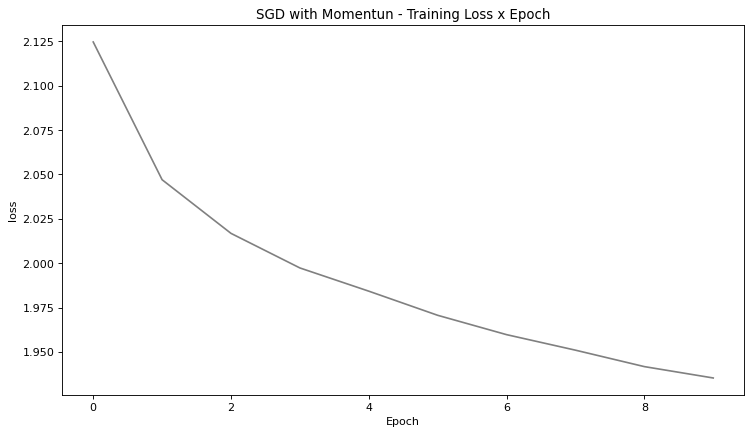

In [15]:
import matplotlib.pyplot as plt

# Plot the resulting losses
plt.figure(figsize=(11, 6), dpi=80)
plt.plot(range(len(dict_losses['sgd_mom'])), dict_losses['sgd_mom'],    color = 'grey')
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.title("SGD with Momentun - Training Loss x Epoch")
plt.show()

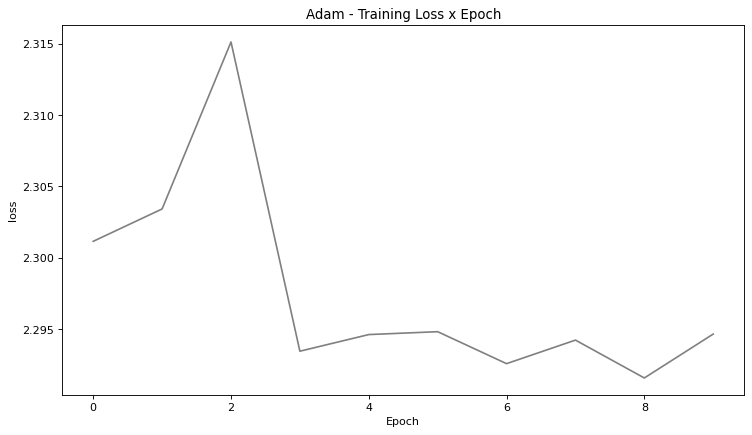

In [16]:
import matplotlib.pyplot as plt

# Plot the resulting losses
plt.figure(figsize=(11, 6), dpi=80)
plt.plot(range(len(dict_losses['adam'])), dict_losses['adam'],    color = 'grey')
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.title("Adam - Training Loss x Epoch")
plt.show()

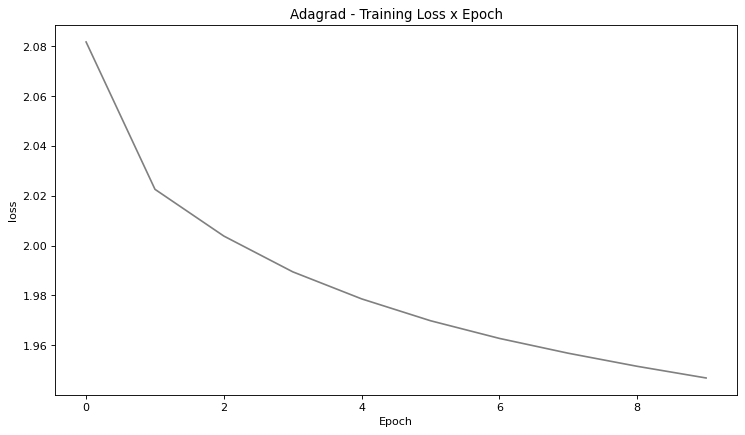

In [17]:
plt.figure(figsize=(11, 6), dpi=80)
plt.plot(range(len(dict_losses['adagrad'])), dict_losses['adagrad'],    color = 'grey')
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.title("Adagrad - Training Loss x Epoch")
plt.show()

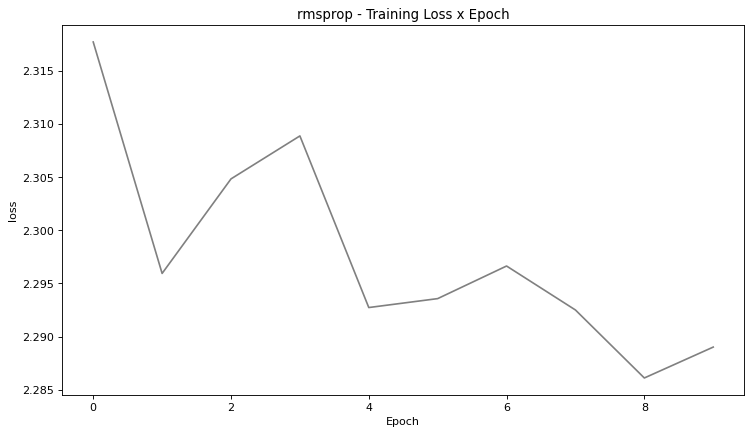

In [18]:
plt.figure(figsize=(11, 6), dpi=80)
plt.plot(range(len(dict_losses['rmspop'])), dict_losses['rmspop'],    color = 'grey')
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.title("rmsprop - Training Loss x Epoch")
plt.show()